In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import Fetch_FS
import Fetch_Here

In [2]:
tdf = pd.read_csv('ResidentialAreas_Here_Final.csv')
rdf = pd.read_csv('ResidentialAreasNeighbourhood_Here_Final.csv')

In [3]:
rdf.head()

,lat,lon,Eat and Drink,Entertainment,Transport,Leisure,Shopping,Services,Facilities
0,28.63361,77.28226,100,63,51,100,100,100,100
1,28.63270,77.28046,100,71,56,100,100,100,100
2,28.62567,77.29413,79,49,15,6,100,100,100
3,28.63312,77.30028,100,26,14,5,100,100,100
4,28.63790,77.30080,87,29,5,8,100,100,100


In [4]:
X = np.array(rdf.drop(['lat','lon'],axis=1))
X = np.stack(X)

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

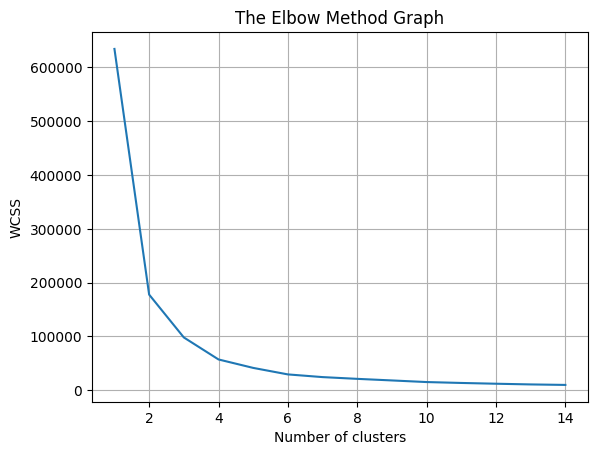

In [6]:
wcss = []
maxsize = 15
for cluster_size in range(1,maxsize):
    kmeans = KMeans(n_clusters=cluster_size, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,maxsize),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [7]:
optimal = 3
kmeans = KMeans(n_clusters=optimal, init='k-means++', max_iter=1000, n_init=125, random_state=0)
y_kmeans = kmeans.fit_predict(X_pca)
rdf['cluster']=y_kmeans

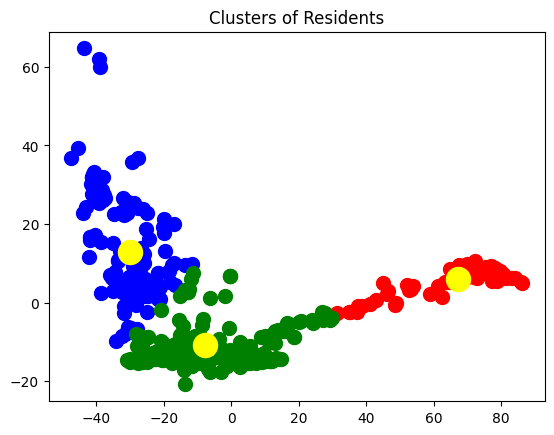

In [8]:
plt.scatter(X_pca[y_kmeans==0, 0], X_pca[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_pca[y_kmeans==1, 0], X_pca[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X_pca[y_kmeans==2, 0], X_pca[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Residents')
plt.show()

In [9]:
mapping = dict()
for name,x,y in zip(tdf.name,tdf.lat,tdf.lon):
    mapping[(x,y)]=name

In [10]:
import folium
this_map = folium.Map(prefer_canvas=True)
latlon = [(x,y,c) for x,y,c in zip(rdf['lat'],rdf['lon'],rdf['cluster'])]
coloring = {0:'red', 1:'blue', 2:'green'}
for coord in latlon:
    folium.CircleMarker(location=[coord[0], coord[1]],
                        radius=2,
                        weight=5,
                        color=coloring[coord[2]],
                        popup=mapping[(coord[0],coord[1])]).add_to(this_map)
this_map.fit_bounds(this_map.get_bounds())
this_map

In [11]:
from minisom import MiniSom
input_size = X.shape[1]
som = MiniSom(x=3, y=1, input_len=input_size, sigma=0.7, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X, 100)
cluster_labels = np.zeros(len(X))
for i, x in enumerate(X):
    cluster_labels[i] = int(som.winner(x)[0] + som.winner(x)[1] * 3)

In [12]:
rdf['cluster'] = cluster_labels
rdf['cluster'] = rdf['cluster'].astype(int)
rdf['cluster'].values

array([2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0,
       0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 0, 2, 1,
       2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0,
       0, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1,
       1, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0, 2, 0,
       1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 0, 0,
       0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 0,
       1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2, 2,

In [13]:
latlon = [(x,y,c) for x,y,c in zip(rdf['lat'],rdf['lon'],rdf['cluster'])]

map = folium.Map(prefer_canvas=True)

colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray', 'blueviolet', 'cyan', 'magenta', 'yellow', 'tan', 'aquamarine', 'salmon']

for coord in latlon:
    folium.CircleMarker(location=[coord[0], coord[1]],
                        radius=2,
                        weight=5,
                        color=colors[coord[2]],
                        popup=mapping[(coord[0],coord[1])]).add_to(map)
map.fit_bounds(this_map.get_bounds())
map

In [14]:
som_size = (3,1)
features = ['Restaurant' , 'Fruit and Vegetable', 'Grocery Store' , 'Health and Medicine', 'Sweets and Snacks', 'Metro Station']
cluster_means = np.zeros((som_size[0], som_size[1], X.shape[1]))
for i in range(len(X)):
    w = som.winner(X[i])
    cluster_means[w[0], w[1], :] += X[i]
for i in range(som_size[0]):
    for j in range(som_size[1]):
        if np.sum(cluster_means[i, j, :]) > 0:
            cluster_means[i, j, :] /= np.sum(cluster_means[i, j, :])

for i in range(som_size[0]):
    for j in range(som_size[1]):
        print(f'Cluster ({i}, {j}):')
        for k, feature in enumerate(features):
            print(f'{feature}: {cluster_means[i, j, k]}')
        print('\n')

Cluster (0, 0):
Restaurant: 0.15978263251309244
Fruit and Vegetable: 0.08271797006814646
Grocery Store: 0.02511120362863466
Health and Medicine: 0.022437934132392576
Sweets and Snacks: 0.23665008655257797
Metro Station: 0.23665008655257797


Cluster (1, 0):
Restaurant: 0.2020313942751616
Fruit and Vegetable: 0.0934927346065996
Grocery Store: 0.03333819312824999
Health and Medicine: 0.04422413374155611
Sweets and Snacks: 0.20897118141614424
Metro Station: 0.20897118141614424


Cluster (2, 0):
Restaurant: 0.16753498825211974
Fruit and Vegetable: 0.1023802226989478
Grocery Store: 0.07410358565737052
Health and Medicine: 0.15337623863520278
Sweets and Snacks: 0.16753498825211974
Metro Station: 0.16753498825211974




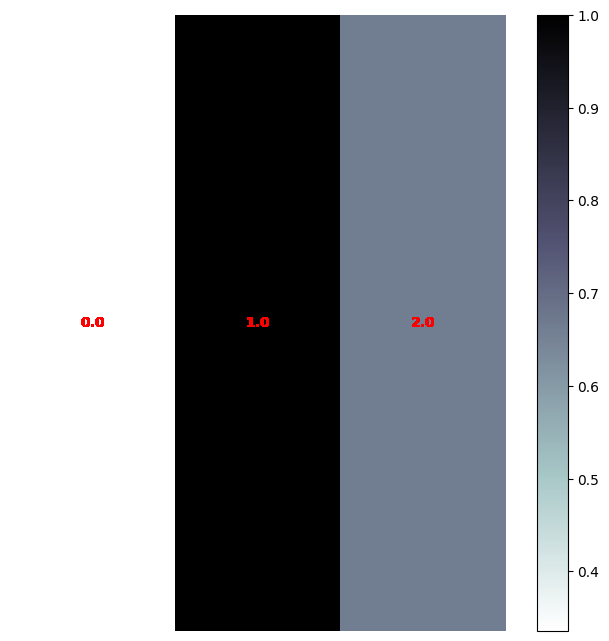

In [15]:
plt.figure(figsize=(8,8))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()
for i, x in enumerate(X):
    w = som.winner(x)
    plt.text(w[0]+0.5, w[1]+0.5, str(cluster_labels[i]), color='red', fontweight='bold', ha='center', va='center')
plt.axis('off')
plt.show()

In [16]:
map.save("results_minisom.html")
this_map.save("results_kmeans.html")

In [17]:
components = pca.components_

tempdf = rdf.drop(['lat','lon','cluster'],axis=1)

first_component = components[0]
feature_contributions = pd.DataFrame({'feature': pd.DataFrame(X, columns=tempdf.columns).columns, 'contribution': first_component})
feature_contributions = feature_contributions.sort_values('contribution', ascending=False)

print(feature_contributions)

         feature  contribution
3        Leisure      0.857997
2      Transport      0.344294
1  Entertainment      0.307188
0  Eat and Drink      0.225695
4       Shopping     -0.000000
5       Services     -0.000000
6     Facilities     -0.000000
